# Лабораторная работа №5
## Ансамбли моделей машинного обучения

## Задание:
1. Выберите набор данных (датасет) для решения задачи классификации или регресии.
2. В случае необходимости проведите удаление или заполнение пропусков и кодирование категориальных признаков.
3. С использованием метода train_test_split разделите выборку на обучающую и тестовую.
4. Обучите следующие ансамблевые модели:
    - одну из моделей группы бэггинга (бэггинг или случайный лес или сверхслучайные деревья);
    - одну из моделей группы бустинга;
    - одну из моделей группы стекинга.
5. (+1 балл на экзамене) Дополнительно к указанным моделям обучите еще две модели:
    - Модель многослойного персептрона. По желанию, вместо библиотеки scikit-learn возможно использование библиотек TensorFlow, PyTorch или других аналогичных библиотек.
    - Модель МГУА с использованием библиотеки - https://github.com/kvoyager/GmdhPy (или аналогичных библиотек). Найдите такие параметры запуска модели, при которых она будет по крайней мере не хуже, чем одна из предыдущих ансамблевых моделей.
6. Оцените качество моделей с помощью одной из подходящих для задачи метрик. Сравните качество полученных моделей.

In [174]:
from sklearn.impute import SimpleImputer
from sklearn.impute import MissingIndicator
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from typing import Tuple
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.metrics import mean_squared_error, mean_absolute_error
from sklearn.tree import DecisionTreeClassifier
import graphviz 
from sklearn.tree import export_graphviz
from sklearn import tree
from operator import itemgetter
from sklearn.ensemble import RandomForestClassifier,RandomForestRegressor, StackingRegressor, GradientBoostingRegressor
from sklearn.linear_model import LogisticRegression, LinearRegression

In [134]:
data = pd.read_csv("powerplants (global) - global_power_plants.csv")

In [180]:
type(data)

pandas.core.frame.DataFrame

In [135]:
#Первые 5 записей датасета
data.head()

,country code,country,name of powerplant,capacity in MW,latitude,longitude,primary_fuel,secondary fuel,other_fuel 1,other_fuel 2,start date,owner of plant,geolocation_source,generation_gwh_2020,generation_data_source,estimated_generation_gwh_2020
0,AFG,Afghanistan,Kajaki Hydroelectric Power Plant Afghanistan,33.0,32.322,65.1190,Hydro,NaN,NaN,NaN,NaN,NaN,GEODB,NaN,NaN,119.50
1,AFG,Afghanistan,Kandahar DOG,10.0,31.670,65.7950,Solar,NaN,NaN,NaN,NaN,NaN,Wiki-Solar,NaN,NaN,18.29
2,AFG,Afghanistan,Kandahar JOL,10.0,31.623,65.7920,Solar,NaN,NaN,NaN,NaN,NaN,Wiki-Solar,NaN,NaN,18.72
3,AFG,Afghanistan,Mahipar Hydroelectric Power Plant Afghanistan,66.0,34.556,69.4787,Hydro,NaN,NaN,NaN,NaN,NaN,GEODB,NaN,NaN,174.91
4,AFG,Afghanistan,Naghlu Dam Hydroelectric Power Plant Afghanistan,100.0,34.641,69.7170,Hydro,NaN,NaN,NaN,NaN,NaN,GEODB,NaN,NaN,350.80


In [136]:
#Проверка наличия пустых значений
data.isnull().sum()

country code                         0
country                              0
name of powerplant                   0
capacity in MW                       0
latitude                             0
longitude                            0
primary_fuel                         0
secondary fuel                   32992
other_fuel 1                     34660
other_fuel 2                     34844
start date                       17489
owner of plant                   14068
geolocation_source                 419
generation_gwh_2020              25277
generation_data_source           23536
estimated_generation_gwh_2020     1798
dtype: int64

In [137]:
#Размер исходного датасета
data.shape

(34936, 16)

In [138]:
#Проверка типов
data.dtypes

country code                      object
country                           object
name of powerplant                object
capacity in MW                   float64
latitude                         float64
longitude                        float64
primary_fuel                      object
secondary fuel                    object
other_fuel 1                      object
other_fuel 2                      object
start date                       float64
owner of plant                    object
geolocation_source                object
generation_gwh_2020              float64
generation_data_source            object
estimated_generation_gwh_2020    float64
dtype: object

In [139]:
def test_num_impute_col(dataset, column, strategy_param):
    temp_data = dataset[[column]]
    
    indicator = MissingIndicator()
    mask_missing_values_only = indicator.fit_transform(temp_data)
    
    imp_num = SimpleImputer(strategy=strategy_param)
    data_num_imp = imp_num.fit_transform(temp_data)
    
    filled_data = data_num_imp[mask_missing_values_only]
    dataset[column] = data_num_imp
    return column, strategy_param, filled_data.size, filled_data[0], filled_data[filled_data.size-1]

In [140]:
#Удаление ненужных столбцов
data = data.drop(columns=["generation_gwh_2020","country", "primary_fuel","secondary fuel", "other_fuel 1", "other_fuel 2", "owner of plant", "generation_data_source", "owner of plant", "start date", "name of powerplant", "country code","geolocation_source"], axis=1)
#test_num_impute_col(data, 'generation_gwh_2020', 'median')

In [141]:
#Кодирование категориальных признаков
#LE = LabelEncoder()
#for column in ["country","primary_fuel"]:
#    data[column] = LE.fit_transform(data[column])

In [142]:
data.isnull().sum()

capacity in MW                      0
latitude                            0
longitude                           0
estimated_generation_gwh_2020    1798
dtype: int64

In [143]:
data = data.dropna(axis=0, how='any')

In [144]:
data.isnull().sum()

capacity in MW                   0
latitude                         0
longitude                        0
estimated_generation_gwh_2020    0
dtype: int64

In [145]:
data.head()

,capacity in MW,latitude,longitude,estimated_generation_gwh_2020
0,33.0,32.322,65.1190,119.50
1,10.0,31.670,65.7950,18.29
2,10.0,31.623,65.7920,18.72
3,66.0,34.556,69.4787,174.91
4,100.0,34.641,69.7170,350.80


In [146]:
data.dtypes

capacity in MW                   float64
latitude                         float64
longitude                        float64
estimated_generation_gwh_2020    float64
dtype: object

<AxesSubplot:>

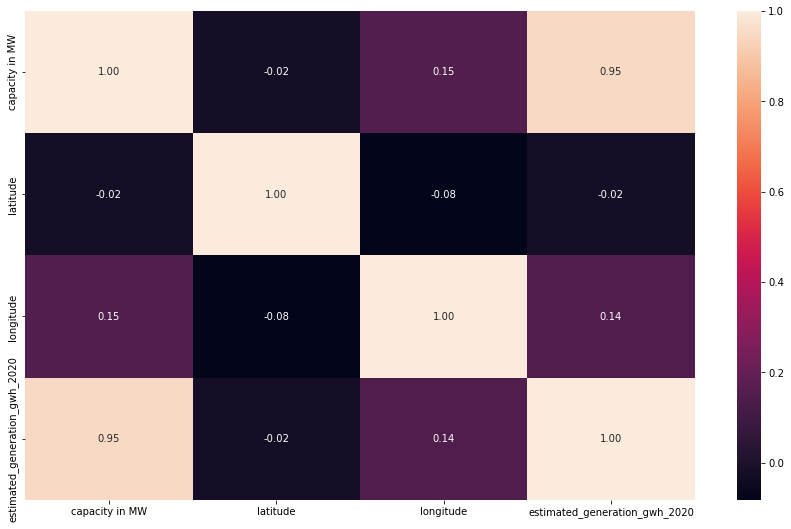

In [147]:
fig, ax = plt.subplots(figsize=(15,9))
sns.heatmap(data.corr(method='pearson'), ax=ax, annot=True, fmt='.2f')

In [148]:
xArray = data.drop("estimated_generation_gwh_2020", axis=1)
yArray = data["estimated_generation_gwh_2020"]

In [149]:
#Разделяем выборку для обучения модели
trainX, testX, trainY, testY = train_test_split(xArray, yArray, test_size=0.2, random_state=1)
trainX, testX, trainY, testY

(       capacity in MW  latitude  longitude
 21809            4.60   38.6522    35.7591
 13159           26.00   51.3698     6.6615
 2127             1.08  -15.5920   -56.0875
 7470            30.00   22.7500   115.4167
 11823           26.00   45.1481     3.2920
 ...               ...       ...        ...
 8435            96.00   37.5600   105.0170
 34282            1.30   33.9347  -116.6405
 5814            48.00   25.3800   119.4500
 13057           30.00   52.4903    13.8299
 34799         1120.00   21.0725   107.3500
 
 [26510 rows x 3 columns],
        capacity in MW  latitude  longitude
 12039         18.7102   43.6121     4.8564
 15879       1779.6000   36.8387    53.2593
 5733          20.0000   33.3490   113.0820
 17462        449.0000   25.7192  -100.1017
 21475        114.0000   12.7547   101.1637
 ...               ...       ...        ...
 29180          1.0000   33.9192  -118.1286
 34096        774.0000   47.9469  -119.8653
 837           12.0000   47.1667    15.3333
 13

## Случайный лес

In [155]:
RForest = RandomForestRegressor(n_estimators=5, oob_score=True, random_state=10)
RForest.fit(trainX, trainY)

D:\Programs\anaconda3\lib\site-packages\sklearn\ensemble\_forest.py:833: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable oob estimates.
  warn("Some inputs do not have OOB scores. "


RandomForestRegressor(n_estimators=5, oob_score=True, random_state=10)

In [156]:
RForest.predict(testX)

array([  35.19 , 6591.728,   36.19 , ...,   25.548,   95.982,   27.772])

In [157]:
estimateRF = mean_absolute_error(testY, RForest.predict(testX))
estimateRF

176.03807412995374

In [165]:
RForestarr = list()
RForest = RandomForestRegressor(n_estimators=100, oob_score=True, random_state=10)
RForest.fit(trainX, trainY)
RForestarr.append(mean_absolute_error(testY, RForest.predict(testX)))

In [178]:
RForest = RandomForestRegressor(n_estimators=200, oob_score=True, random_state=10)
RForest.fit(trainX, trainY)
RForestarr.append(mean_absolute_error(testY, RForest.predict(testX)))

In [179]:
RForestarr

[164.59361515554505, 164.58021531213186]

## Boosting

In [170]:
GB = GradientBoostingRegressor(random_state=1)
GB.fit(trainX, trainY)

GradientBoostingRegressor(random_state=1)

In [171]:
mean_absolute_error(testY, GB.predict(testX))

182.06374404338914

## Stacking

In [175]:
base_learners = [
                 ('RF', RandomForestRegressor(n_estimators=10, random_state=1)),
                 ('GB', GradientBoostingRegressor(n_estimators=10, random_state=1))             
                ]

SC = StackingRegressor(estimators=base_learners, final_estimator=LinearRegression())
SC.fit(trainX, trainY)

StackingRegressor(estimators=[('RF',
                               RandomForestRegressor(n_estimators=10,
                                                     random_state=1)),
                              ('GB',
                               GradientBoostingRegressor(n_estimators=10,
                                                         random_state=1))],
                  final_estimator=LinearRegression())

In [177]:
mean_absolute_error(testY, SC.predict(testX))

187.3790040119118